In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
mat = scipy.io.loadmat("migrate_rates.mat")

In [6]:
migration = pd.DataFrame(mat["migratesS1"])

In [7]:
migration.columns = ["year", "treatment", "control", "exp_response", "sd_err"]

In [12]:
migration["upper_90"] = migration.exp_response + 1.96*migration.sd_err
migration["lower_90"] = migration.exp_response - 1.96*migration.sd_err

In [22]:
migration.dropna(inplace = True)

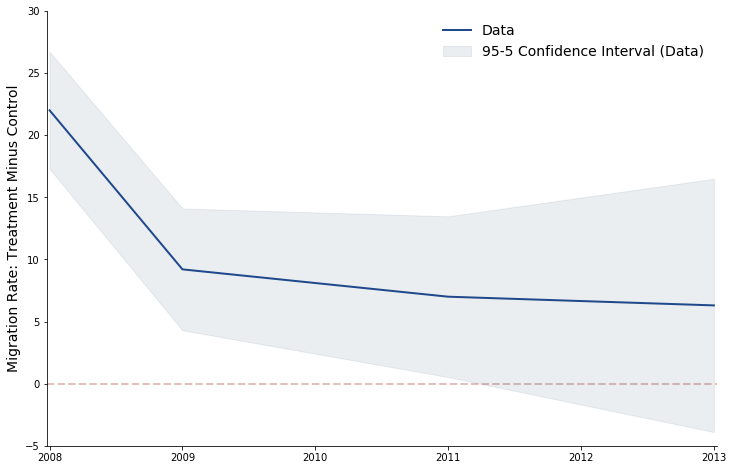

In [46]:
fig, ax = plt.subplots(figsize = (12,8))

mike_blue = tuple(np.array([20, 64, 134]) / 255)

ax.plot(migration.year, migration.exp_response, alpha = 0.95, color = mike_blue, linewidth = 2, linestyle= "-"
        , label = "Data")

ax.fill_between(migration.year, migration.lower_90, migration.upper_90, color = "#3F5D7D", alpha = 0.1
               , label = "95-5 Confidence Interval (Data)")

ax.legend(loc = 0, frameon  = False, fontsize = 14)

ax.hlines(0, 2007.98, 2013.02,
           linewidth = 2, color = 'darkred', alpha =0.25, linestyle = "--")

ax.set_ylim(-5,30)
ax.set_xlim(2007.98,2013.02)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel('Migration Rate: Treatment Minus Control', fontsize = 14)

#plt.savefig(fig_path + "migration_rates.pdf", bbox_inches = "tight", dip = 3600)

plt.show()